1. На сайте ncbi нашла 3 последовательности S-protein SARS-COV-2:

1) S-surface glycoprotein, Severe acute respiratory syndrome coronavirus 2, NC_045512.2:21563-25384

2) S - spike glycoprotein, SARS coronavirus Tor2 (isolate: Tor2, nat-host: Homo sapiens; patient #2 with severe acute respiratory syndrome (SARS)), NC_004718.3:21492-25259

3) S - spike protein, Middle East respiratory syndrome-related coronavirus (strain: HCoV-EMC, isolate: HCoV-EMC/2012, nat-host: Homo sapiens), NC_019843.3:21456-25517

4) Последовательность с семинара - 11302.

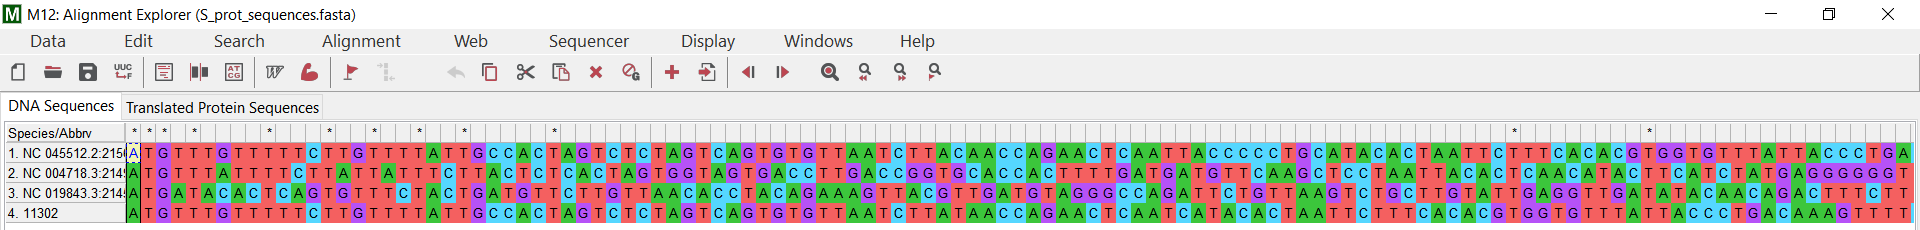

Далее сделала выравнивание последовательностей, файл формата .mega на гитхаб

Посчитаем матрицу попарных расстояний методом Maximum Composite Likelihood

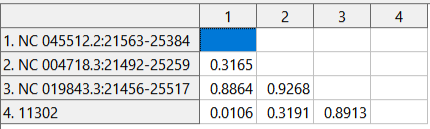

Получили такое дерево:
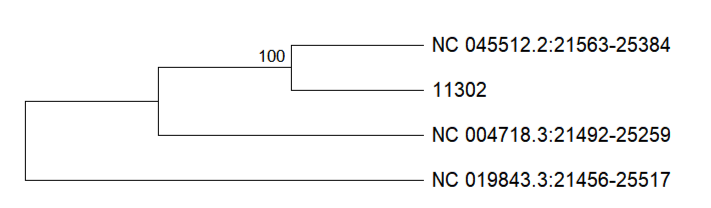

Выводы: дерево строилось методом UPGMA. sum of branch length = 1.066.Был проведен bootstrap (100 повторений). Эволюционные расстояния были посчитаны методом - Maximum Composite Likelihood.

Видим, что аутгруппа - Middle East respiratory syndrome-related coronavirus,  Severe acute respiratory syndrome coronavirus 2 наиболее близок к 11302 и образуют отдельную кладу.

2. Найдем последовательности ортологов методом, описанным на biostars

Посмотрим на ортологи генов BRCA1 человека. BRCA1 является человеческим геном-супрессором опухолей. экспрессируются в тканях молочных желез и других органов, где они участвуют в устранении повреждений ДНК или в уничтожении клеток, в которых репарация ДНК невозможна

для этого активируем окружение ncbi_datasets на сервере

datasets download gene accession NM_007297.4 --ortholog all

Скачала файл с последовательностями с сервера на локальный компьютер.

Построила деревья методом UPGMA и Maximum Composite Likelihood для расчета матриц попарного расстояния

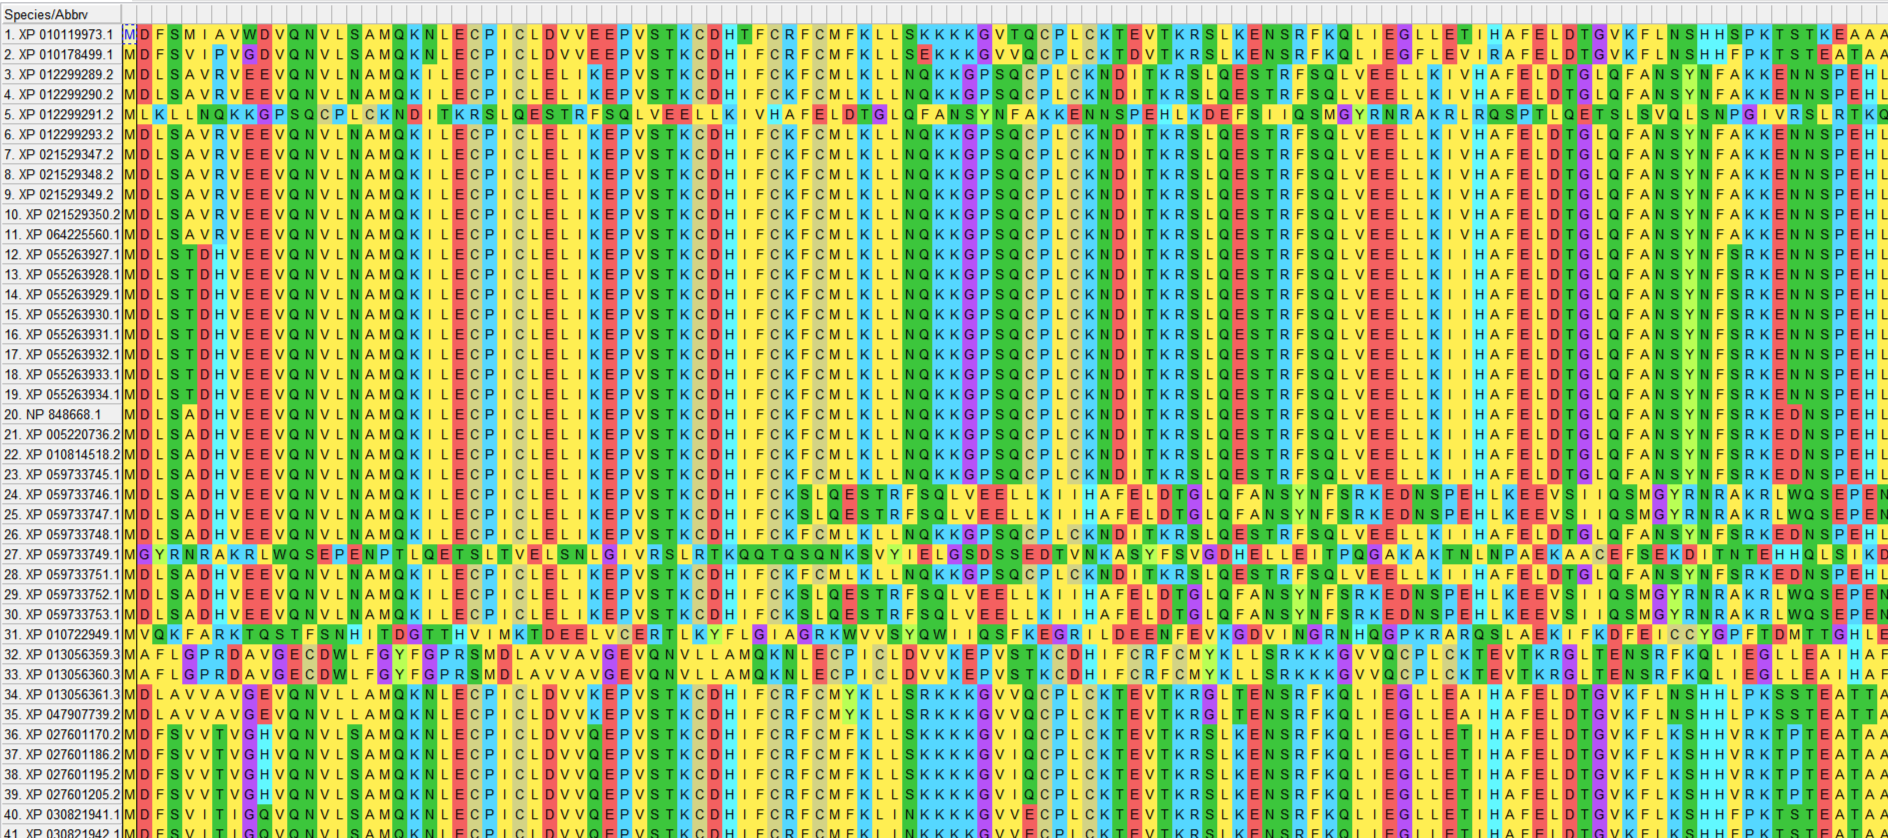

Для быстрой работы далее использовались только первые 10 последовательностей.

Выравнивание clustalomega (файл на гитхабе):
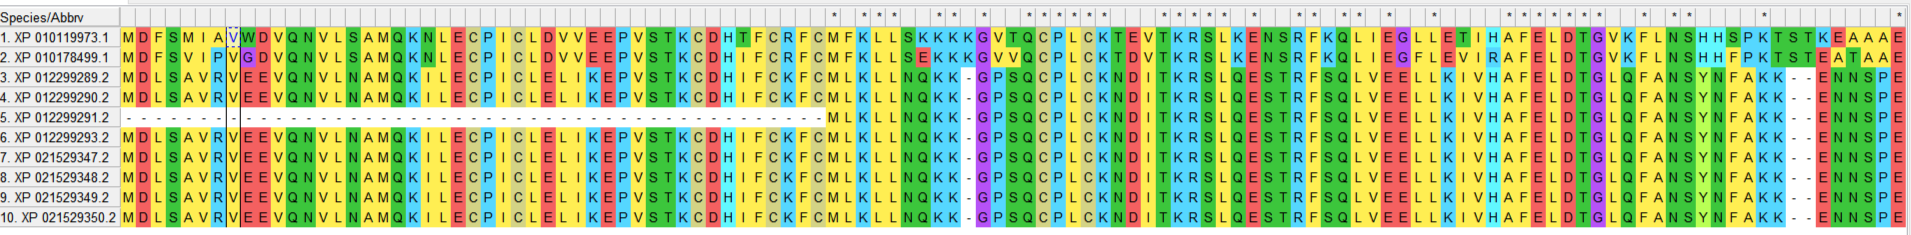

Матрица попарных расстоняий:

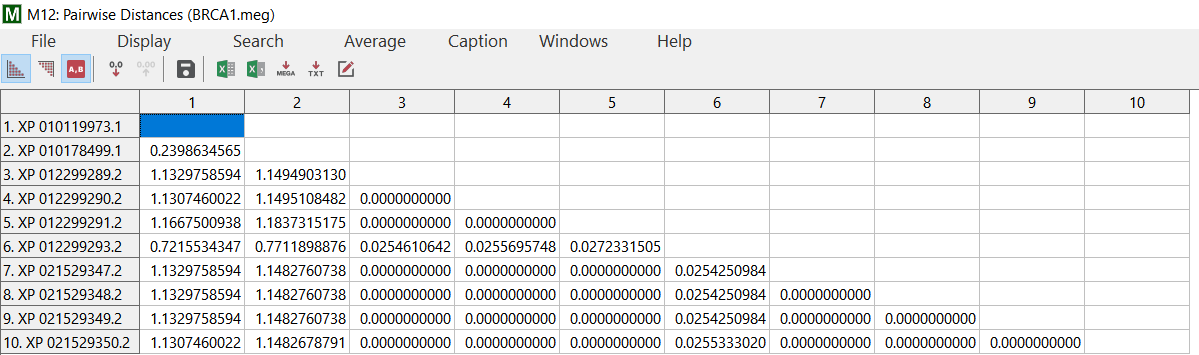

Получили дерево:

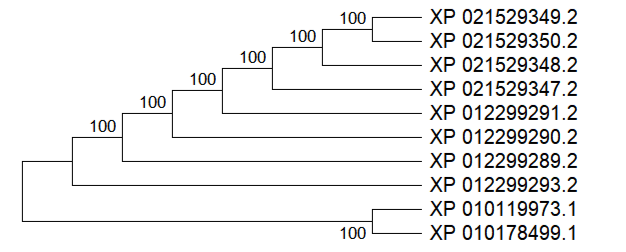

Выводы: дерево построено методом UPGMA. Оптимальное дерево с sum of branch length=1.228. Матрица попарных расстояний посчитана с помощью Poisson Correction Method.

Дерево укорененное, аутгруппа - клада из XP 010119973.1 и XP 010178499.1
наиболее эволюционно далекие от аутгруппы - это XP 021529349.2 и XP 021529350.2.

Посчитаем расстояние Левенштейна в кладе в аутгруппе. И между аутгруппой и самой эволюционно новой группой.


In [1]:
def levenshtein_distance(s1, s2):

    m, n = len(s1), len(s2)


    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j


    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                cost = 0
            else:
                cost = 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,
                dp[i][j - 1] + 1,
                dp[i - 1][j - 1] + cost
            )

    return dp[m][n]




In [2]:
str1 = "MDFSMIAVWDVQNVLSAMQKNLECPICLDVVEEPVSTKCDHTFCRFCMFKLLSKKKKGVTQCPLCKTEVTKRSLKENSRFKQLIEGLLETIHAFELDTGVKFLNSHHSPKTSTKEAAAELLRKESSVIQSKGFRKRGRSAKGNGQENHTLEANVDTQLADTRVKRCPLRNKTRERDSEKGIYIEFGSDSSEELFNQASNTGFEDKEALQVSSLEKPEDPKSAEKGNEYSCNTQPAKLRAKEIVLPNVIGESDFSKEGLSKKSPRSITEYPKPDQVNTTEHQSSPLNVLAVDLLTEQCDRIGNASPSRNGDTSFFKNSEEMDAEQTQCNSESKEFDLKDSSESRLDKSKEINVVVQSVEAMEMYEPEFDSFHQKELPLEKRLQPEPIHCATLNQVSRKRLKRSIQKVNEWFSKSNEILSSNSSQDDSAEATDVSGEGDTCLSDKDSCISEKTDPMVASTEIAVIEGDKRGSKQAADIIKDKIFGKTYKRERKSNPTIILRDTLPTTKKEDVAADEKCLNNSSKDRLKRKRKTAHVLQPEDFIKKKDTEEADGCPESVNRCPGDGEKRRCDESSAINESHLSENREDNTLAELEEGGWKKATEKLTGKHCDSGLELNNRDLKSTKKSSSAAKRSRGSTRTMCTLQLVVARNSLSPDAAEPQIDSYPSSEEPRKVDSEQSQVRRSRRLQLLSKETGKGAVIKGARKCNSDHEGSSFEVQRNMLVHISECKDPCEPQGTLSYKPLTNPEGGDLEEANEIQVSLKNPSDTAETGKSLFNPVSSCQHSNCSSFAPDSQEGEILGSRLLLQSPSMTVGQNASHPTEQVTELCTTFPQPSGHDMQNVPGDFRTEKLPVAKNVTELTKEGEDSELDTQYLRNIFRHSKRLSFSLYHAPVKACVVDDAAPETLKICADQEENNHSKYLKPENFQKEKTTAESLSRVCKNEALKTCESDCVSPVTGVVGNSECMRAGEHQEDVSPVANLGSLTPIRMGTARTEDKNGSQKGEQGNEKPVSTDVGIESELRQNAIESNRSQSYQSNTEEHMSQRTDLSTVDEICFHSESNQAGKAEVVDGKGPILHFQSGSVICPATCQQRPAEFSCEVTEKKSSKRERKQVKGSEEQATQTASTGIPKCLAPEALEESLKGNTDFTGLSETPDGLLCSDEDIEENTSFLETDRGERSAVFLKRNDSALVKELKDINVSSKSRSQGIRRSRRRAQKLQSSDEESSEDEDLPCFQTLLFGKSVSTPLQVDKQVTPVVELVESSVSPVTLPHNGSHGDYNMQKMPETAVSHGCISPSQESECSVNLFSSQSNLSEESVNGAQELKKPLIQDHTSKQVSSVNESKETSQSCNGGLKGSKCNFKDECQEDLNVGANLGEASGYDSETSNVEDSCEPFSQGEILTTQQKNTMQNNLKKLQQEMAVLEAVLKQHGSQDCEVLPIHRKLPHSSGERTLGMEEMREERENADEQKSGTRLNSASVLSNLSGNVNRSPNNSTSSVRLLNPRTAEATNSSVVAQNANKSCTRESKSKRSVCFPVSILHNAAGKENATSTAVNKRKEMSIVASGLNKSEHLVVQKFARKTQSTLSNHITEGTTHVIMKTDKDLVCERTLKYFLGIAGRKWVVSYHWIIQSFKEGRILDEENFEVRGDVINGRNHQGPKRARQSLTEKIFKDFEICCYGPFTDMTTEHLEWMVELCGASVVKQLHLFMRTANSTAVVVVQPDAWTENTDYRAIQQKSNVAMVTREWVLDSVACYERQELDAYLVS"
str2 = "MDFSVIPVGDVQNVLSAMQKNLECPICLDVVEEPVSTKCDHIFCRFCMFKLLSEKKKGVVQCPLCKTDVTKRSLKENSRFKQLIEGFLEVIRAFELDTGVKFLNSHHFPKTSTEATAAEFLCKENSVIQSKGFRNRKKYAEENGQENCILQEANVDTQLTDTRIKRCSLRNKTQKCDSEKRIYIEFGSDSSEELFKQASNTGLGGNKALQISFQEKLEELKSAKKGNEYSCDTQPDKPGTDETTPPDVIDESNFSKEGLSKKSTQSITEYAKPGQVNMTEYQSSPLNVLAVDLLTEQCDRIGNASPLRNVDTSFFKNTKEMDAEQTKCNSKSKELDLKDSSESGLDKSKEINVVKSVEAVEMYEAENDSFHEKALPLEKVLQPETGHGATLKEVSRKRLKQSIQKVNEWFSKKNKILSSNSSQDDSAGATDVSDEGDTCLSDKDSCISEKTDSMVDSMEITVVEGNQRRSKQTADDIKDKIFGKTYKRERKSHPPVTLRDVLPTTTKDDVAAAKCLNNCSKDGLKRKRRTARVLQPEDFIKKKDTEEADGCPHSVNWCLGDAEDKKCDESSAVNESHLSENRKDNTLAEVEEGGGGIRKKATEKVTGKHCDGEVELSNCDQKSTKKRSSAANRCRRSTRTMCALQLVDRNSVSPDPVEPQIDSYPSSEEPRKADSKQRQVRCSRRLQLLSEEITNETGKGVEIKGPRKFDSDHEGSFSGVQRNVLVHASECKDLCEPPGTLSYRPLTNLKGGDLVASEIQISLKNTSDTTEAGRSLFKPTSSCQHSNCSSFAPDAGSQESEIQDSPLFLQPPSMAAVQTASHPAQDGTESCATFPQDVGCDMQSVPGDFKTEKLPMAKNVLELTKEAEDSELDTQYLRNIIRHSKRQSFSLYPTPVKVHAVEDPAYETLKVPRADQVEKKHSKYSKPENLQEEKTTAESLSRVCEEEKLKTYESACVSPVSCFVDSTECIFSEDYQDVSQVANQRTLTPKRMGTSRTEDKNRLQKGEQGNEKTVSADMGIESELRQNPMKSSRSQSDQSNTDGNIFKGTVLSTVEVSFSSESKQAGTAKAVDGKGPILHFQSRSMVCPATCQQRPTGLSCKVIGKKSSKRERKQVKGNEEQATQTASTEMPGCLVTDAPEEPLKGSSDFTGLSETPNGLLCSDDSEENTSFSETDRRERSAVFVKSDSAQAKELHKSNVSSQPRSQGIKRSRRRTAQKLQSSDEESSEDEDLPCFQTLIFGKSVSTPLQIDKQVTSVVESSVSPITLPHSQSHDDNMQRMPEAALSSGCISPSQESECSVNLFSSQSNMSEESIDQAQELKKPLIQANTSKQVSNVNENKETSQSCDGELKRNKTNFKGECQEDPNTGANLGEASGYDSETSYVEDSCGPFSQGEILTTQQKSAMQNNLKKLQQEMAVLEAALKQHGSQDCEPLPSHRKLPHSNSEGILGMEQMRQERSRCPELLLPSSKSCLVKRPNLEKGLQRGRGVKNKAPSERTKPVQEAAQEYRQCQLDAESADEQKSGTRLSTSSALSKLSGNVTRYPNNSSSSGRLLNPQTAEATNGSVVAQNANKSCTQESKLKRSVCFPTSVLHNPAGKENAASPVVTSGKEMSIVASGLNQSEHLVVQKFARKTRSTLSSQIAEGTTHVIMKTDKELVCERTLKYFLGIAGRKWVVSYQWVIQSFKEGRILDEENFEVRGDVINGRNHQGPKRARLSLTEKIFKDFEICCYGPFTDMTTEHLEWMVELCGASVVKQLHLFTHTTNSTAVVVVQPDAWMENTDYRAIQQENNVAMVTREWVLDSVACYECQKLDAYLVS"
print(f"Расстояние Левенштейна между XP_010119973.1 и XP_010178499.1: {levenshtein_distance(str1, str2)}")

Расстояние Левенштейна между XP_010119973.1 и XP_010178499.1: 448


In [3]:
str1 = "MDFSMIAVWDVQNVLSAMQKNLECPICLDVVEEPVSTKCDHTFCRFCMFKLLSKKKKGVTQCPLCKTEVTKRSLKENSRFKQLIEGLLETIHAFELDTGVKFLNSHHSPKTSTKEAAAELLRKESSVIQSKGFRKRGRSAKGNGQENHTLEANVDTQLADTRVKRCPLRNKTRERDSEKGIYIEFGSDSSEELFNQASNTGFEDKEALQVSSLEKPEDPKSAEKGNEYSCNTQPAKLRAKEIVLPNVIGESDFSKEGLSKKSPRSITEYPKPDQVNTTEHQSSPLNVLAVDLLTEQCDRIGNASPSRNGDTSFFKNSEEMDAEQTQCNSESKEFDLKDSSESRLDKSKEINVVVQSVEAMEMYEPEFDSFHQKELPLEKRLQPEPIHCATLNQVSRKRLKRSIQKVNEWFSKSNEILSSNSSQDDSAEATDVSGEGDTCLSDKDSCISEKTDPMVASTEIAVIEGDKRGSKQAADIIKDKIFGKTYKRERKSNPTIILRDTLPTTKKEDVAADEKCLNNSSKDRLKRKRKTAHVLQPEDFIKKKDTEEADGCPESVNRCPGDGEKRRCDESSAINESHLSENREDNTLAELEEGGWKKATEKLTGKHCDSGLELNNRDLKSTKKSSSAAKRSRGSTRTMCTLQLVVARNSLSPDAAEPQIDSYPSSEEPRKVDSEQSQVRRSRRLQLLSKETGKGAVIKGARKCNSDHEGSSFEVQRNMLVHISECKDPCEPQGTLSYKPLTNPEGGDLEEANEIQVSLKNPSDTAETGKSLFNPVSSCQHSNCSSFAPDSQEGEILGSRLLLQSPSMTVGQNASHPTEQVTELCTTFPQPSGHDMQNVPGDFRTEKLPVAKNVTELTKEGEDSELDTQYLRNIFRHSKRLSFSLYHAPVKACVVDDAAPETLKICADQEENNHSKYLKPENFQKEKTTAESLSRVCKNEALKTCESDCVSPVTGVVGNSECMRAGEHQEDVSPVANLGSLTPIRMGTARTEDKNGSQKGEQGNEKPVSTDVGIESELRQNAIESNRSQSYQSNTEEHMSQRTDLSTVDEICFHSESNQAGKAEVVDGKGPILHFQSGSVICPATCQQRPAEFSCEVTEKKSSKRERKQVKGSEEQATQTASTGIPKCLAPEALEESLKGNTDFTGLSETPDGLLCSDEDIEENTSFLETDRGERSAVFLKRNDSALVKELKDINVSSKSRSQGIRRSRRRAQKLQSSDEESSEDEDLPCFQTLLFGKSVSTPLQVDKQVTPVVELVESSVSPVTLPHNGSHGDYNMQKMPETAVSHGCISPSQESECSVNLFSSQSNLSEESVNGAQELKKPLIQDHTSKQVSSVNESKETSQSCNGGLKGSKCNFKDECQEDLNVGANLGEASGYDSETSNVEDSCEPFSQGEILTTQQKNTMQNNLKKLQQEMAVLEAVLKQHGSQDCEVLPIHRKLPHSSGERTLGMEEMREERENADEQKSGTRLNSASVLSNLSGNVNRSPNNSTSSVRLLNPRTAEATNSSVVAQNANKSCTRESKSKRSVCFPVSILHNAAGKENATSTAVNKRKEMSIVASGLNKSEHLVVQKFARKTQSTLSNHITEGTTHVIMKTDKDLVCERTLKYFLGIAGRKWVVSYHWIIQSFKEGRILDEENFEVRGDVINGRNHQGPKRARQSLTEKIFKDFEICCYGPFTDMTTEHLEWMVELCGASVVKQLHLFMRTANSTAVVVVQPDAWTENTDYRAIQQKSNVAMVTREWVLDSVACYERQELDAYLVS"
str2 = 'MDLSAVRVEEVQNVLNAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIVHAFELDTGLQFANSYNFAKKENNSPEHLKDEFSIIQSMGYRNRAKRLRQSPTLQETSLSVQLSNPGIVRSLRTKQWIQPQNKSVYIDLAPCEFSEKDITNTEHHQSSNNNLNTTEKHATERHPEKYQGSSVSNLQVEPCGTNTHASSLQHENSSLLLTKDRLNVEKAEFCNKSKQPGLARSQHNRWAKSEETCNDRQTPSTEKKVDLDADPLHGRKEWNEQKPPCSENPRDDTEDVAWITLNSSIQKVNEWFSRSDELLTSDDSHDKGSESNAKVAEALEVLNEVDGYSSSSEKIDLLASDPHDALICKSERVHCKSVESSIEDKIFGKTYRRKASLPNLSHVTENLIIGAFVTEPQIAQEHPLTNKLKRKRRVTSGLHPEDFIKKADLAIQKTPEKINQGTNQMEQNDQVMNITNSGHENKTKGDSIQNENNPNPVESLEKESFRSKAEPISSSISNMELELNIHNSKASKKNRLRRKSSTRHIHELELVVSRNLSPPNYTEVQIDSCSSSEEIKKKNYNQMPVRHSRKLQLMEDKERSTGAKKSSKPNEQTSKIHASDTFPELRLTNIPDSFTNCSNTNELKEFVNPSLPREEKEEKLETVKLSNDAKDPKDLLLSGESVLQVERSVESSSISLIPGTDYGTQESVSLLEVSTLGKAKTEPNKCVSQCAAFENPKERIHGCSKDTRNGTEDFKYPLGPEVNYSQETSIDMEESELDTQYLQNTFKVSKRQSFALFSNPGNPEKECATFSAHSRSLKKQSPKVTLECEQKEENQGEKESNIEPVETVNITAGFPMVCQKDKPVDYAKCIEGGSRLCLSSQFRGNETGLIIPNKHGLLQNPYHIPPLIPNRSFVKTKCKKNLLEENSEEHSVSPERAMGNKNIIPSTVSTISHNNRENAFKETSSSSINEVGSNTNEVGSSTNEVGSSTNEVGSSDENIQAEIGRNRRPKLNAMLRLELLQPEIYKQSLPISNCKHPEIKQQEHEEVVQTVNTDLSPCLISDNLEQHMGSSHTSQVCSETPEDLLDDGEIKEDTSFAEYGIKETSAVFSKSVQRELSRSPSPFTHTHLAQVYQRGAKKLESSEENLSSEEEELPCFQHLLFGKVSNTPQSTRHSTVATECLSKNTEKNLLSLKSSLNDCSNQVILAEASQEHHLNEETKCSGSLFSSQCSELEDLTTNTNTQDPFLIDSSKQMRHQSESQGIGLSDKELVSDDEEKGTDLEEDNQEEQSMDSNLGEAAFGYESETSITEDCSGLSSQSDILTTQQRDTMQDNLIKLQQEMAELEAVLEQDGSQPSHSSPSIITDSSALEDLRNPEQSTSEKVKAVLTSQKSSEYPISQNPEGLSADKFEVSPDSSTSKNKEPGVERSSPSKCQSLDDRWCVHSCSGSLQNGNYPSQEELVKVDVEEQQLEKSGPQDLMEPSYLPRQDLEGTPYLESGIRLFSDDPESDPSEDRAPESSHAGSIPSSASTSKVPQFQVAESAKSLAAAHTNTAGCNAVEESVSRKKPELAASTERVNKRMSMVVSGLTPEEFVLVYKFARKHHITLTNQITEETTHVVMKTDAEFVCERTLKYFLGIAGGKWVVSYFWVTQSIKERKMLNEHDFEVRGDVVNGRNHQGPRRARESQGRKIFRGLEICCYGPFTNMPTDQLEWMVQLCGASVVKELSSFTLGTGIHAVVVVQPDAWTEDNGFHAIGQMCEAPVVTREWVLDSVALYQCQELDAYLIPQIPHSHY'

In [4]:
print(f"Расстояние Левенштейна между XP_010119973.1 и XP_021529350.2 : {levenshtein_distance(str1, str2)}")

Расстояние Левенштейна между XP_010119973.1 и XP_021529350.2 : 1216
